<a href="https://colab.research.google.com/github/JRMJ14/datasets-de-practica/blob/main/congelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Configuración del entorno
#env = gym.make("FrozenLake-v1", render_mode="ansi")
env = gym.make("FrozenLake-v1", is_slippery=False)

# Inicialización de la tabla Q
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Parámetros de Q-learning
alpha = 0.1       # Tasa de aprendizaje
gamma = 0.99      # Factor de descuento
epsilon = 1.0     # Tasa de exploración inicial
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 1000

# Lista para registrar las recompensas por episodio
all_rewards = []

# Entrenamiento del agente
for episode in range(episodes):
    state, _ = env.reset()  # Reiniciar entorno al inicio de cada episodio
    total_rewards = 0
    done = False

    while not done:
        # Selección de acción: exploración vs explotación
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploración
        else:
            action = np.argmax(q_table[state])  # Explotación

        # Tomar acción y observar el resultado
        next_state, reward, done, _, _ = env.step(action)

        # Actualización de la tabla Q
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Fórmula de actualización de Q-learning
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Actualización del estado
        state = next_state
        total_rewards += reward

    # Reducir epsilon para disminuir la exploración a medida que aprende
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Almacenar las recompensas obtenidas en cada episodio
    all_rewards.append(total_rewards)

# Imprimir la tabla Q entrenada
print("Tabla Q entrenada:")
print(q_table)

Tabla Q entrenada:
[[8.08984219e-01 9.50990050e-01 6.13932138e-01 8.58534969e-01]
 [8.38285230e-01 0.00000000e+00 9.47939835e-07 6.50371656e-02]
 [5.73717122e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.12411733e-01 9.60596010e-01 0.00000000e+00 8.42677965e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.31672310e-01 0.00000000e+00 9.70299000e-01 8.73105565e-01]
 [8.41316919e-01 9.80100000e-01 8.26079782e-01 0.00000000e+00]
 [1.79050618e-01 9.77031338e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.17100849e-01 9.90000000e-01 8.81272574e-01]
 [8.65117328e-01 8.56171199e-01 1.00000000e+00 7.55523885e-01]
 [0.00000000e+00 0.00000000e+00 0.00

In [ ]:
# Evaluación del agente en modo de explotación (epsilon = 0)
test_episodes = 100
total_test_rewards = 50

for episode in range(test_episodes):
    state, _ = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state])  # Elegir la mejor acción
        next_state, reward, done, _, _ = env.step(action)
        total_test_rewards += reward
        state = next_state

print(f"Recompensa media en evaluación: {total_test_rewards / test_episodes}")

Recompensa media en evaluación: 1.5


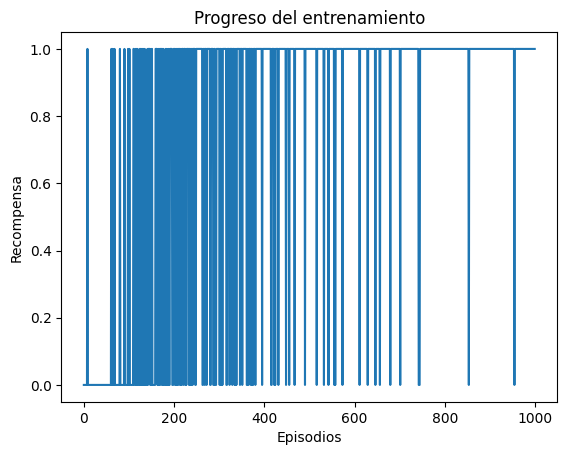

In [ ]:
plt.plot(all_rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa")
plt.title("Progreso del entrenamiento")
plt.show()

In [ ]:
print("Tabla Q entrenada:")
print(q_table)

Tabla Q entrenada:
[[8.08984219e-01 9.50990050e-01 6.13932138e-01 8.58534969e-01]
 [8.38285230e-01 0.00000000e+00 9.47939835e-07 6.50371656e-02]
 [5.73717122e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.12411733e-01 9.60596010e-01 0.00000000e+00 8.42677965e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.31672310e-01 0.00000000e+00 9.70299000e-01 8.73105565e-01]
 [8.41316919e-01 9.80100000e-01 8.26079782e-01 0.00000000e+00]
 [1.79050618e-01 9.77031338e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.17100849e-01 9.90000000e-01 8.81272574e-01]
 [8.65117328e-01 8.56171199e-01 1.00000000e+00 7.55523885e-01]
 [0.00000000e+00 0.00000000e+00 0.00